1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import math
%matplotlib inline

A
 [[-1.3130044   0.15762858 -0.30361479 ... -0.84701239 -0.00639888
   0.73813446]
 [ 0.49245306  5.38975905 -3.54180958 ... -0.49408821  0.86586287
  -0.14751697]
 [-2.13355574  5.7050162  -4.14903915 ... -2.18811299  0.85306512
   1.32875196]]

Covariance matrix: 
 [[ 1.0150262   1.03623259  3.06628499]
 [ 1.03623259  9.75167102 11.8241362 ]
 [ 3.06628499 11.8241362  17.95670619]]
Eigenvalues:
 [2.67436214e+01+0.j 7.49059381e-16+0.j 1.97978206e+00+0.j]
Eigenvectors:
 [[-0.11974728 -0.81649658  0.56479547]
 [-0.57198308 -0.40824829 -0.71145533]
 [-0.81147763  0.40824829  0.41813561]]

l
 [2.67436214e+01+0.j 7.49059381e-16+0.j 1.97978206e+00+0.j]

l_svd
 [2.67627721e+01 1.98188761e+00 1.15094876e-31]
are they the same? False
[0.9310519718343614, 0.0689480281656386, 4.004043800269736e-33]
[[ 1.60739518e+00 -7.73087072e+00  5.42890722e+00 ...  2.15990925e+00
  -1.18666849e+00 -1.08254102e+00]
 [-1.98364095e+00 -1.36205623e+00  6.14889688e-01 ... -1.04124140e+00
  -2.63244106e-01  1.0771

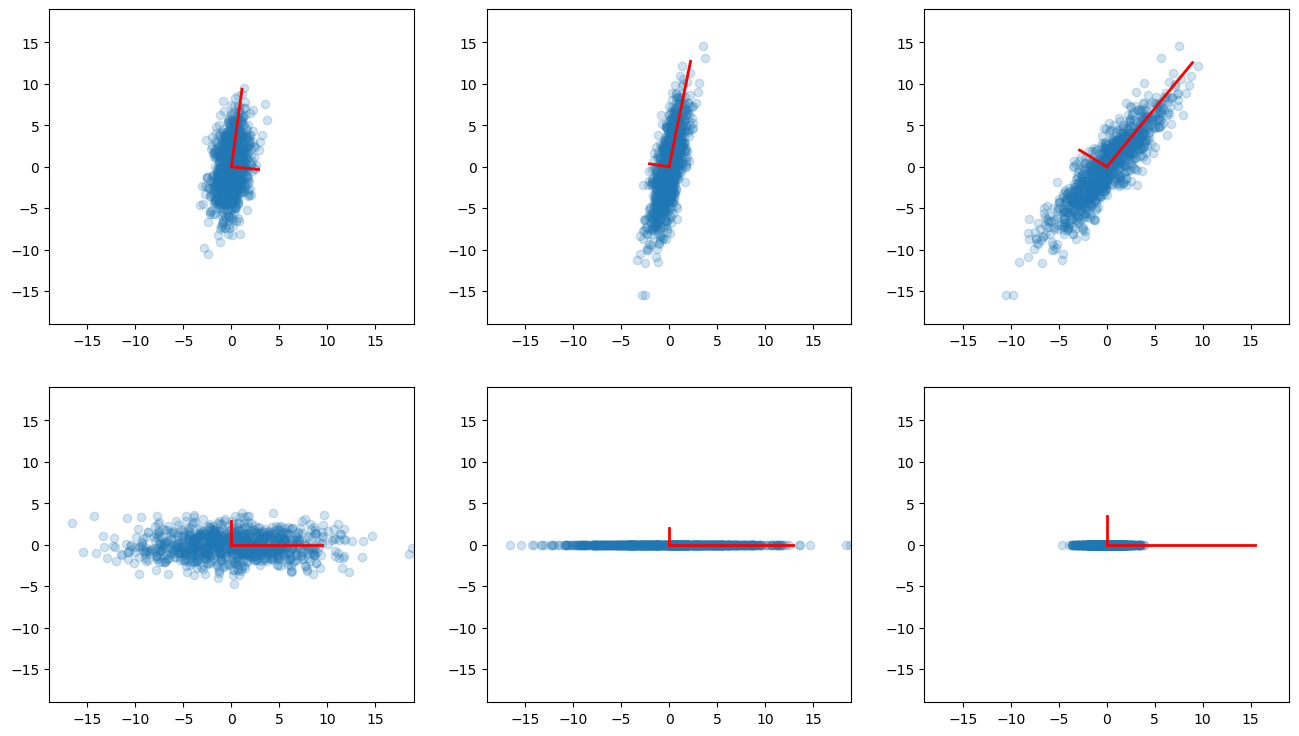

In [5]:
def displaySubplot(ax, xMaxVal, X_0, X_1, l, V, scale_factor):
    ax.scatter(X_0, X_1, alpha=0.2)
    ax.set_xlim([-xMaxVal, xMaxVal])
    ax.set_ylim([-xMaxVal, xMaxVal])
    
    for li, vi in zip(l, V.T):
        if li * vi[0] < 0 and li * vi[1] < 0:
            ax.plot([0, -scale_factor * li * vi[0]], [0, -scale_factor * li * vi[1]], 'r-', lw=2)
        else:
            ax.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)

N = 1000
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2 * x1 + x2

# Create a NumPy array to store the dataset
A = np.row_stack((x1, x2, x3))

print("A\n",A)

cov = np.cov(A)
print("\nCovariance matrix: \n",cov)

l, V = la.eig(cov)
#l = np.real_if_close(l)
print("Eigenvalues:\n",l)
print("Eigenvectors:\n",V)

U, s, Vt = la.svd(A)
l_svd = s**2/(N-1)
V_svd = U
print("\nl\n",l)
print("\nl_svd\n",l_svd)
print("are they the same?",np.allclose(l,l_svd))


# Calculate the percentage of variability explained by principal components

explained_variability = []
for i in range(len(l_svd)):
    explained_variability.append(l_svd[i]/np.sum(l_svd))
print(explained_variability)

# Find the minimum number of principal components to retain 99% of variability
#num_components_99_percent = np.argmax(explained_variability >= 0.99) + 1

# Reduce dimensionality using the selected number of components
Ap = np.dot(V_svd.T, A)
print(Ap)

A_12 = np.row_stack((x1, x2))
A_13 = np.row_stack((x1, x3))
A_23 = np.row_stack((x2, x3))


U, S, Vt = np.linalg.svd(A_12)
l_12 = S/math.sqrt(N-1)
V_12 = U

U, S, Vt = np.linalg.svd(A_13)
l_13 = S/math.sqrt(N-1)
V_13 = U

U, S, Vt = np.linalg.svd(A_23)
l_23 = S/math.sqrt(N-1)
V_23 = U

scale_factor = 3

xMaxVal = np.abs(A).max()
xMaxVal = math.ceil(xMaxVal)
xpMaxVal = np.abs(Ap).max()
xpMaxVal = math.ceil(xpMaxVal)
xMaxVal = max(xMaxVal, xpMaxVal)

fig, axs = plt.subplots(2, 3, figsize= (16,9))

ax = axs[0, 0]
displaySubplot(ax, xMaxVal, A[0,:], A[1,:], l_12, V_12, scale_factor)

ax = axs[0, 1]
displaySubplot(ax, xMaxVal, A[0,:], A[2,:], l_13, V_13, scale_factor)

ax = axs[0, 2]
displaySubplot(ax, xMaxVal, A[1,:], A[2,:], l_23, V_23, scale_factor)

ax = axs[1, 0]
displaySubplot(ax, xMaxVal, Ap[0,:], Ap[1,:], l_12, np.dot(V_12.T, V_12), scale_factor)

ax = axs[1, 1]
displaySubplot(ax, xMaxVal, Ap[0,:], Ap[2,:], l_13, np.dot(V_13.T, V_13), scale_factor)

ax = axs[1, 2]
displaySubplot(ax, xMaxVal, Ap[1,:], Ap[2,:], l_23, np.dot(V_23.T, V_23), scale_factor)

plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

[[-1.31300440e+00  1.57628576e-01 -3.03614786e-01 ... -8.47012389e-01
  -6.39887667e-03  7.38134464e-01]
 [ 4.92453057e-01  5.38975905e+00 -3.54180958e+00 ... -4.94088213e-01
   8.65862874e-01 -1.47516971e-01]
 [-2.13355574e+00  5.70501620e+00 -4.14903915e+00 ... -2.18811299e+00
   8.53065121e-01  1.32875196e+00]
 ...
 [ 1.81519388e-01  1.25667055e-01 -1.59264416e-01 ...  3.55244000e-01
   4.42976377e-02 -6.53095016e-01]
 [-1.37321650e-01 -2.98769603e-01  8.42759443e-02 ... -1.80886349e-01
  -7.05980280e-02  1.44576647e-02]
 [-4.36935526e-03  3.60222129e-01 -2.73761672e-01 ...  1.94511114e-01
   2.77330422e-01 -4.60006135e-02]]

Covariance matrix: 
 [[ 1.01502620e+00  1.03623259e+00  3.06628499e+00 -1.58038912e-03
  -3.70793201e-03  8.11382369e-03  8.46410233e-03  9.32820567e-04
   3.26887353e-03  6.28042939e-04 -4.78027415e-03  5.62189640e-03
  -1.88969277e-03]
 [ 1.03623259e+00  9.75167102e+00  1.18241362e+01  4.88135608e-02
  -1.77209692e-02 -2.13801401e-02  6.18194436e-03 -4.258075

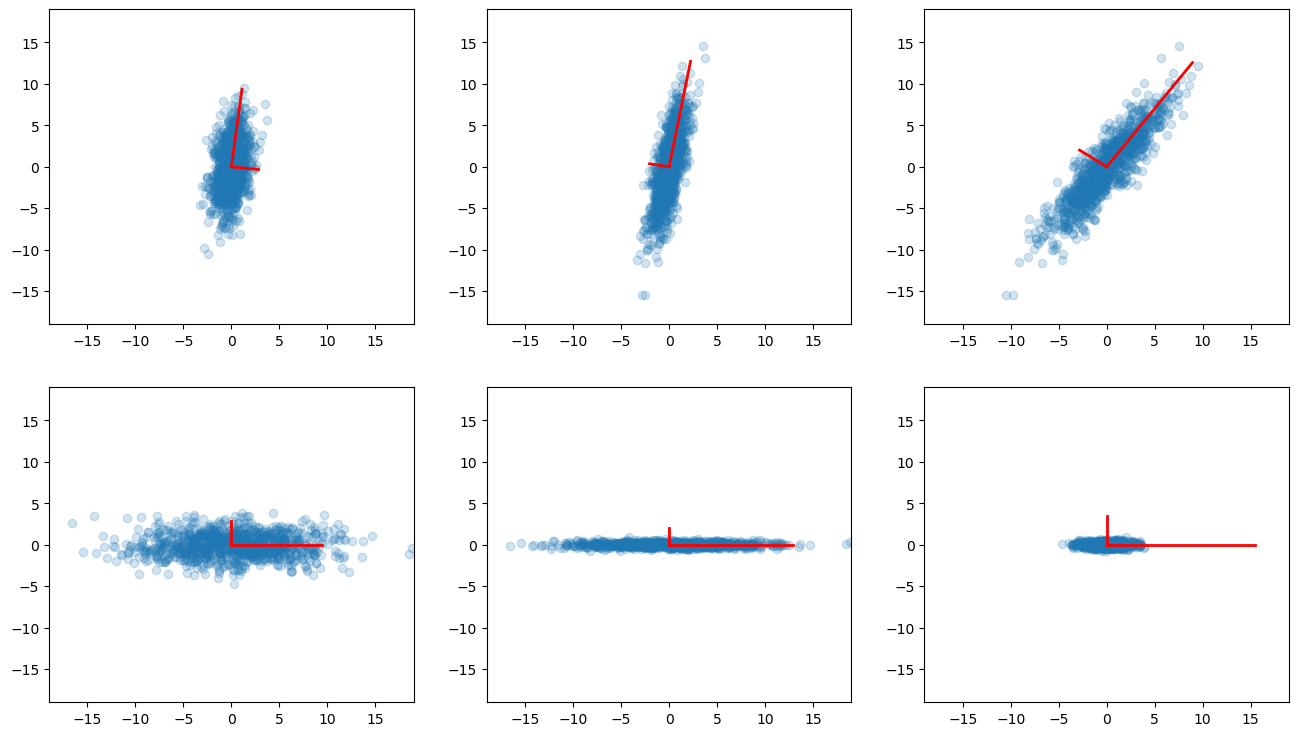

In [12]:
mu = np.zeros(10) 
cv = np.diag(np.full(10, 1/ 20))

noise = np.random.multivariate_normal(mu, cv, N).T

A_noised = np.row_stack((A,noise))
print(A_noised)

cov = np.cov(A_noised)
print("\nCovariance matrix: \n",cov)

l, V = la.eig(cov)
#l = np.real_if_close(l)
print("Eigenvalues:\n",l)
print("Eigenvectors:\n",V)

U, s, Vt = la.svd(A_noised)
l_svd = s**2/(N-1)
V_svd = U
print("\nl\n",l)
print("\nl_svd\n",l_svd)
print("are they the same?",np.allclose(l,l_svd))


# Calculate the percentage of variability explained by principal components

explained_variability = []
for i in range(len(l_svd)):
    explained_variability.append(l_svd[i]/np.sum(l_svd))
print(explained_variability)

# Find the minimum number of principal components to retain 99% of variability
#num_components_99_percent = np.argmax(explained_variability >= 0.99) + 1

# Reduce dimensionality using the selected number of components
Ap = np.dot(V_svd.T, A_noised)
print(Ap)

A_12 = np.row_stack((x1, x2))
A_13 = np.row_stack((x1, x3))
A_23 = np.row_stack((x2, x3))





U, S, Vt = np.linalg.svd(A_12)
l_12 = S/math.sqrt(N-1)
V_12 = U

U, S, Vt = np.linalg.svd(A_13)
l_13 = S/math.sqrt(N-1)
V_13 = U

U, S, Vt = np.linalg.svd(A_23)
l_23 = S/math.sqrt(N-1)
V_23 = U

scale_factor = 3

xMaxVal = np.abs(A_noised).max()
xMaxVal = math.ceil(xMaxVal)
xpMaxVal = np.abs(Ap).max()
xpMaxVal = math.ceil(xpMaxVal)
xMaxVal = max(xMaxVal, xpMaxVal)

fig, axs = plt.subplots(2, 3, figsize= (16,9))

ax = axs[0, 0]
displaySubplot(ax, xMaxVal, A_noised[0,:], A_noised[1,:], l_12, V_12, scale_factor)

ax = axs[0, 1]
displaySubplot(ax, xMaxVal, A_noised[0,:], A_noised[2,:], l_13, V_13, scale_factor)

ax = axs[0, 2]
displaySubplot(ax, xMaxVal, A_noised[1,:], A_noised[2,:], l_23, V_23, scale_factor)

ax = axs[1, 0]
displaySubplot(ax, xMaxVal, Ap[0,:], Ap[1,:], l_12, np.dot(V_12.T, V_12), scale_factor)

ax = axs[1, 1]
displaySubplot(ax, xMaxVal, Ap[0,:], Ap[2,:], l_13, np.dot(V_13.T, V_13), scale_factor)

ax = axs[1, 2]
displaySubplot(ax, xMaxVal, Ap[1,:], Ap[2,:], l_23, np.dot(V_23.T, V_23), scale_factor)

plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 